In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import plotly.express as px
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import folium
import geopandas as gpd
from sklearn.cluster import KMeans

In [2]:
root = os.getcwd()
train_file_path = os.path.join(root, 'train.csv')
test_file_path = os.path.join(root, 'test.csv')
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)
geo_path = os.path.join(root, 'countries.geo.json')

# Data analysis

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [4]:
train_df.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0


In [55]:
print("1% trim for price ", np.percentile(train_df['TARGET(PRICE_IN_LACS)'], (1, 99)))
print("1% trim for longitude", np.percentile(train_df['LONGITUDE'], (1, 99)))
print("1% trim for latitude", np.percentile(train_df['LATITUDE'], (1, 99)))
print("1% trim for square footage ", np.percentile(train_df['SQUARE_FT'], (1, 99)))

1% trim for price  [  12.2 1045. ]
1% trim for longitude [ 9.994    31.292091]
1% trim for latitude [70.785813 88.484911]
1% trim for square footage  [ 375.       5462.568609]


In [10]:
fig=px.box(train_df, x='POSTED_BY', y="TARGET(PRICE_IN_LACS)", title = 'Price By Seller Type')
fig.update_yaxes(
        range=[-10, 300], 
        title_text = "Price in LACS",
        title_standoff = 10)
fig.update_xaxes(
        title_text = "Posted By",
        title_standoff = 10)
fig

(0.0, 10000.0)

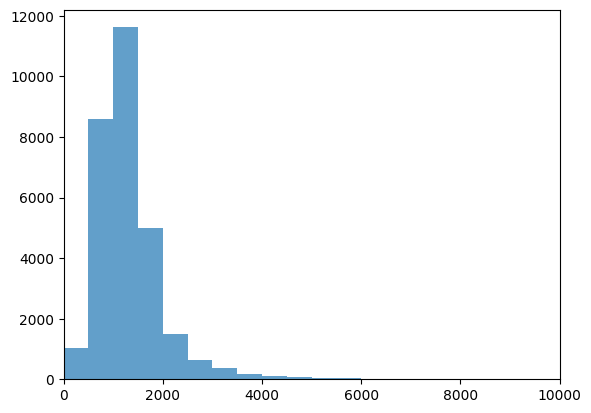

In [56]:
xlow=0
xhigh=10000
plt.hist(x=train_df['SQUARE_FT'], bins=range(xlow,xhigh,500), alpha=0.7, density=False)
plt.xlim(left=xlow, right = xhigh)

**Run this for location visualization**

In [ ]:
df = train_df[['LATITUDE', 'LONGITUDE', 'TARGET(PRICE_IN_LACS)']]
geo_df = gpd.read_file(geo_path)
m = folium.Map(location=[20, 0], zoom_start=2)
folium.GeoJson(geo_path, name='geojson').add_to(m)

for idx, row in df.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"Price: {row['TARGET(PRICE_IN_LACS)']} Lacs"
    ).add_to(m)

m

In [ ]:
df_encoded = pd.get_dummies(train_df, columns=['POSTED_BY', 'BHK_OR_RK', 'ADDRESS'], drop_first=True)
plt.figure(figsize=(12, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

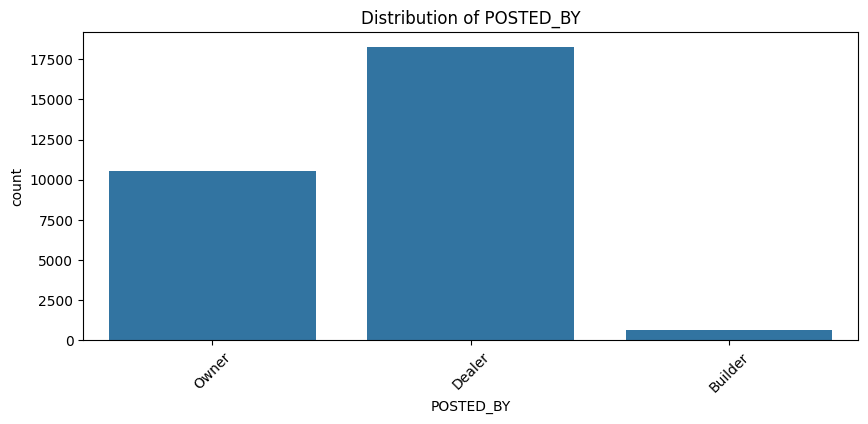

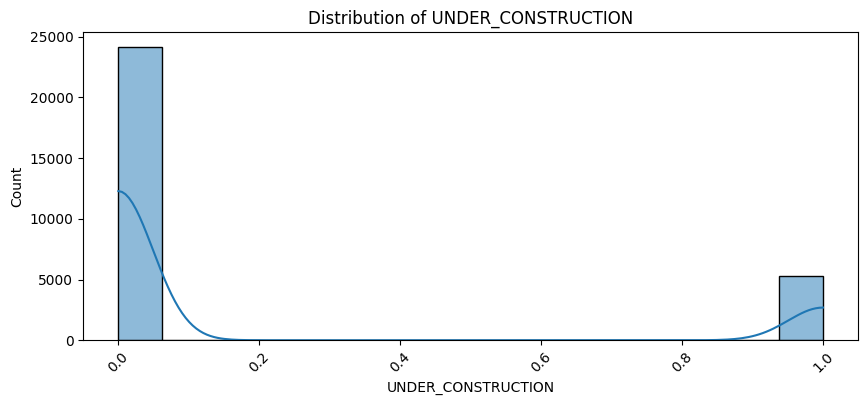

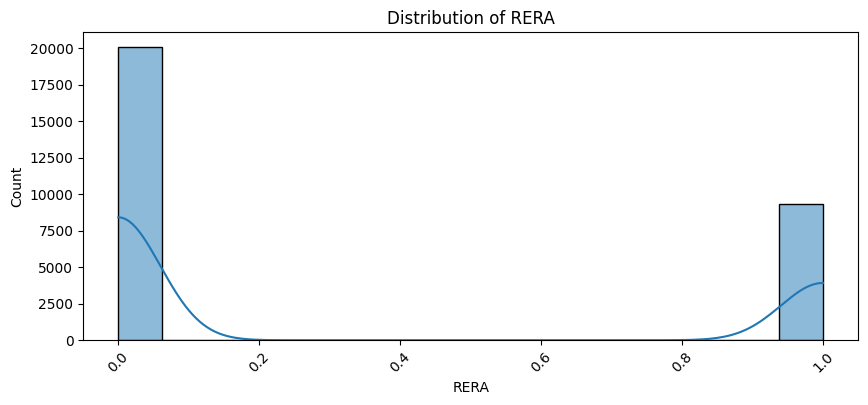

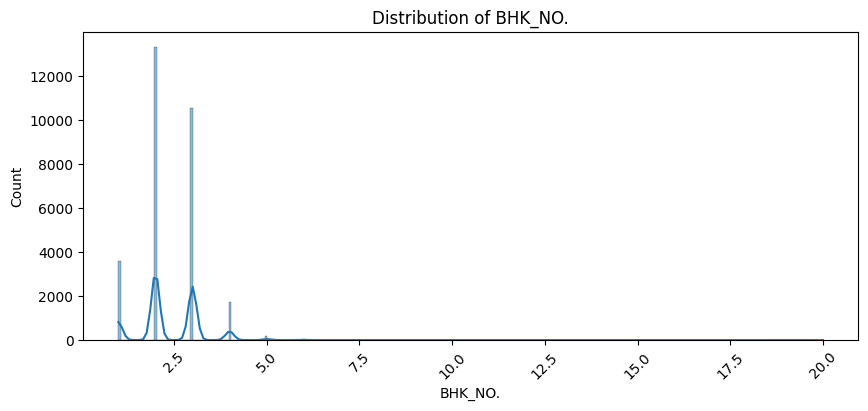

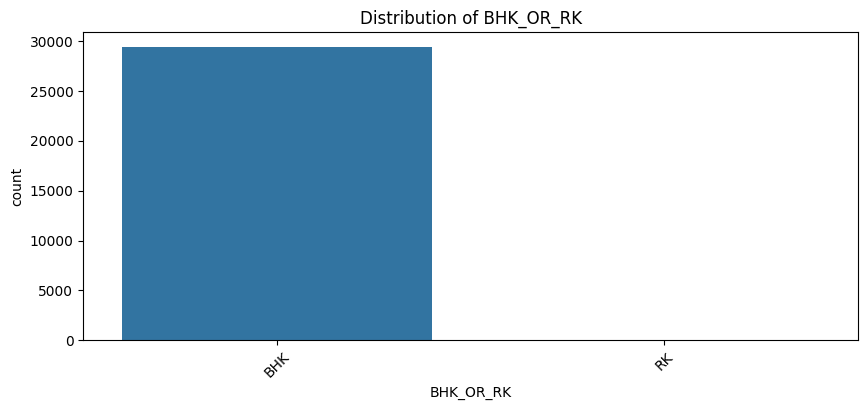

KeyboardInterrupt: 

In [ ]:
for column in train_df.columns:
    plt.figure(figsize=(10, 4))
    if train_df[column].dtype == 'object':
        sns.countplot(x=train_df[column])
        plt.title(f"Distribution of {column}")
    else:
        sns.histplot(train_df[column], kde=True)
        plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()


# Apply multple ML models for prediction

In [19]:
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)
data = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

data = pd.get_dummies(data, columns=['POSTED_BY'], prefix='POSTED_BY')

for col in ['UNDER_CONSTRUCTION', 'RERA', 'READY_TO_MOVE']:
    data[col] = data[col].astype(int)

data['BHK_NO.'] = np.where(data['BHK_NO.'] > 10, 10, data['BHK_NO.'])
data = pd.get_dummies(data, columns=['BHK_OR_RK'], prefix='BHK_OR_RK')
data['SQUARE_FT'] = np.log1p(data['SQUARE_FT'])  

kmeans = KMeans(n_clusters=25, random_state=0)
data['LocationCluster'] = kmeans.fit_predict(data[['LATITUDE', 'LONGITUDE']])
data.drop(columns=['LATITUDE', 'LONGITUDE'], inplace=True)
data['TARGET(PRICE_IN_LACS)'] = np.log1p(data['TARGET(PRICE_IN_LACS)'])  
train_processed = data.iloc[:len(train_df), :]
test_processed = data.iloc[len(train_df):, :].reset_index(drop=True)
train_processed.to_csv('train_processed.csv', index=False)
test_processed.to_csv('test_processed.csv', index=False)

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
warnings.filterwarnings('ignore', category=ConvergenceWarning)

models = {
    "LinearRegression": (LinearRegression(), {}),
    "Ridge": (Ridge(), {
        'alpha': [0.1, 1, 10, 100]
    }),
    "Lasso": (Lasso(), {
        'alpha': [0.1, 1, 10, 100]
    }),
    "DecisionTreeRegressor": (DecisionTreeRegressor(random_state=42), {
        'max_depth': [5, 10, 20],
        'min_samples_split': [5, 10, 20]
    }),
    "RandomForestRegressor": (RandomForestRegressor(random_state=42), {
        'n_estimators': [200, 500, 1000],
        'max_depth': [5, 10, 20]
    }),
    "KNeighborsRegressor": (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7]
    }),
    "AdaBoostRegressor": (AdaBoostRegressor(random_state=42), {
        'n_estimators': [200, 500, 1000],
        'learning_rate': [0.01, 0.1, 1.0]
    }),
    "GradientBoostingRegressor": (GradientBoostingRegressor(random_state=42), {
        'n_estimators': [200, 500, 1000],
        'learning_rate': [0.01, 0.1, 1.0]
    })
}


In [15]:
train = pd.read_csv('train_processed.csv')
test = pd.read_csv('test_processed.csv')

X = train.drop(columns=['TARGET(PRICE_IN_LACS)', 'ADDRESS'])
y = train['TARGET(PRICE_IN_LACS)']

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(test.drop(columns=['TARGET(PRICE_IN_LACS)', 'ADDRESS'], errors='ignore'))

In [25]:
def evaluate_model(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_val)
    mae = mean_absolute_error(y_val, predictions)
    mse = mean_squared_error(y_val, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, predictions)
    
    print(f"Model: {type(best_model).__name__}")
    print(f"Best Params: {grid_search.best_params_}")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}\n")
    
    return best_model, grid_search.best_params_

In [26]:
best_models = {}
for model_name, (model, param_grid) in models.items():
    print(f"Evaluating {model_name}...")
    best_model, best_params = evaluate_model(model, param_grid)
    best_models[model_name] = (best_model, best_params)

Evaluating LinearRegression...
Model: LinearRegression
Best Params: {}
MAE: 0.4744, MSE: 0.3858, RMSE: 0.6211, R^2: 0.4942

Evaluating Ridge...
Model: Ridge
Best Params: {'alpha': 10}
MAE: 0.4742, MSE: 0.3855, RMSE: 0.6209, R^2: 0.4946

Evaluating Lasso...
Model: Lasso
Best Params: {'alpha': 0.1}
MAE: 0.4875, MSE: 0.4073, RMSE: 0.6382, R^2: 0.4660

Evaluating DecisionTreeRegressor...
Model: DecisionTreeRegressor
Best Params: {'max_depth': 10, 'min_samples_split': 20}
MAE: 0.3832, MSE: 0.2742, RMSE: 0.5236, R^2: 0.6406

Evaluating RandomForestRegressor...
Model: RandomForestRegressor
Best Params: {'max_depth': 10, 'n_estimators': 200}
MAE: 0.3681, MSE: 0.2458, RMSE: 0.4957, R^2: 0.6778

Evaluating KNeighborsRegressor...
Model: KNeighborsRegressor
Best Params: {'n_neighbors': 7}
MAE: 0.3805, MSE: 0.2725, RMSE: 0.5220, R^2: 0.6428

Evaluating AdaBoostRegressor...
Model: AdaBoostRegressor
Best Params: {'learning_rate': 0.01, 'n_estimators': 200}
MAE: 0.4621, MSE: 0.3647, RMSE: 0.6039, R^2: